In [1]:
import numpy as np
import pandas as pd
import scipy as sp

In [2]:
from IPython.display import Audio

In [3]:
import matplotlib.pyplot as plt

In [4]:
import mlts_func

In [5]:
aud = sp.io.loadmat('project1.mat')

In [6]:
aud.keys()

dict_keys(['__header__', '__version__', '__globals__', 'fs', 'primary', 'reference'])

In [7]:
fs = aud['fs'][0,0]

In [244]:
fs

21000

In [8]:
noise = np.array(aud['primary'])

In [9]:
noise_speech = np.array(aud['reference'])

In [10]:
ip,op = mlts_func.speech_norm(noise_speech),mlts_func.speech_norm(noise)

In [90]:
ip_2,op_2 = noise_speech,noise

In [11]:
Audio(data = ip,rate = aud['fs'][0,0])

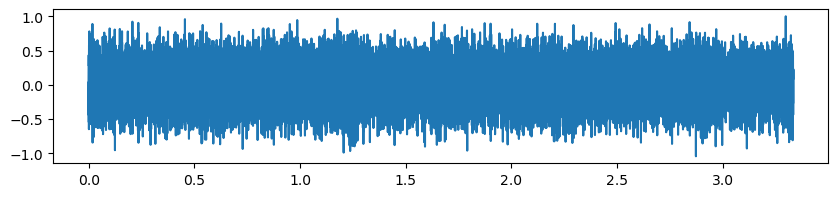

In [246]:
fig = plt.figure(figsize = (10,2))
plt.plot(np.arange(len(ip[0]))*(1/fs),ip[0])

In [241]:
np.arange(len(ip[0]))

(70000,)

In [12]:
Audio(data = op,rate = aud['fs'][0,0])

In [13]:
noise.shape

(1, 70000)

In [14]:
noise_speech.shape

(1, 70000)

In [15]:
fs

21000

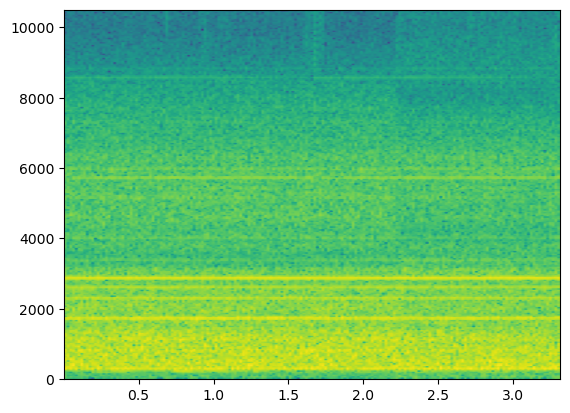

In [16]:
#fig = plt.figure(figsize = (12,4))
_ = plt.specgram(x = ip[0],Fs = fs,NFFT = 512)

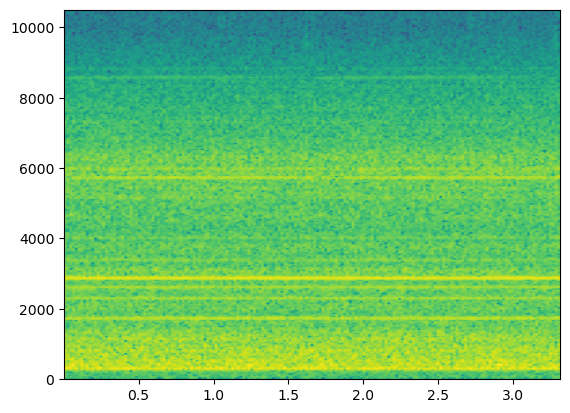

In [17]:
#fig = plt.figure(figsize = (12,4))
_ = plt.specgram(x = op[0],Fs = fs,NFFT = 512)

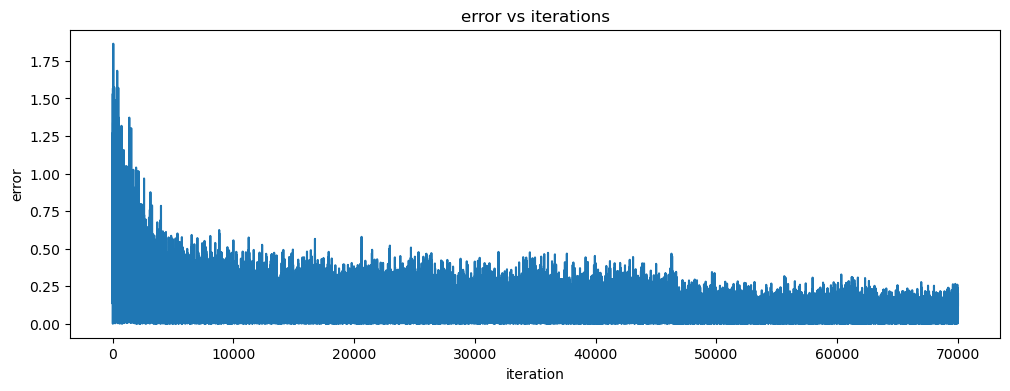

<Axes: xlabel='iterations'>

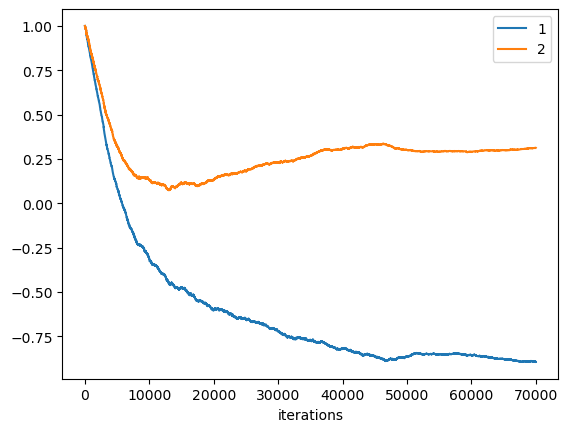

In [91]:
num_wts = 2
wts,nlms_e,wts_opt = mlts_func.nlms(ip,op,num_wts,step_size = 0.0005)
x_vals = np.expand_dims(np.arange(len(nlms_e)),axis = 1)
w_len = len(wts_opt)
col = ['iterations']+[str(i) for i in range(w_len)]
mlts_func.plott_2(x_vals.T[0],np.abs(nlms_e),'error vs iterations','iteration','error')
wts = np.array(wts)
wts_1 = np.expand_dims(wts[:,0],axis = 1)
wts_ = wts/ wts_1
df = pd.DataFrame(columns = col,data = np.concatenate((x_vals,wts_),axis = 1))
df.plot(x='iterations',y = col[2:w_len+1])
#mlts_func.plott_2(wts_[:,1],wts_[:,2],'surface_contour','wts_1','wts_2')

In [19]:
op_speech = mlts_func.err_wav_op(wts_opt,ip,op)
Audio(data = op_speech,rate = aud['fs'][0,0])

In [35]:
print('{0:.4f} dB '.format(erle(wts_opt,ip,op)))

85.4786 dB 


In [36]:
wts_opt

array([ 2.08403154, -1.86178209,  0.6530294 ])

In [38]:
(wts_opt/wts_opt[0])[1:]

array([-0.89335601,  0.31334909])

In [54]:
def freq_resp_d2e(wts_opt):
    
    wts_ = wts_opt/wts_opt[0]
    b = 1
    a = wts_[1:]
    w,h = sp.signal.freqz(b,a)
    fig = plt.figure(figsize = (5,5))
    plt.title('Digital filter frequency response')
    plt.plot(w, 20 * np.log10(abs(h)))
    plt.ylabel('Amplitude [dB]')
    plt.xlabel('Frequency [rad/sample]')
    
    #print(w.shape)
    #print(h.shape)

(512,)
(512,)


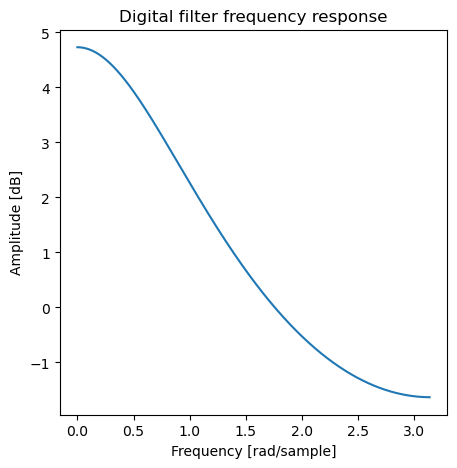

In [55]:
freq_resp_d2e(wts_opt)

In [47]:
wts_ = wts_opt/wts_opt[0]
b = 1
a = wts_[1:]
w,h = sp.signal.freqz(b,a)

In [48]:
w[0]

0.0

In [51]:
20*np.log10(abs(h[0]))

4.731336624213277

In [20]:
# # Surface contour
# ip,op = speech_norm(noise_speech),speech_norm(noise)
# ax = plt.axes(projection='3d')
# w1 = np.linspace(-1,1,1000)
# w2 = np.linspace(-1,1,1000)
# err = np.zeros((1000,1000))

# for i in range(1000):
    
#     for j in range(1000):
        
#         ww = [1,w1[i],w2[j]]
#         err[i][j] = mlts_func.err_wav(ww,ip,op)
        
# T1, T2 = np.meshgrid(w1,w2)
# print(T1.shape)
# print(T2.shape)
# ax.plot_surface(T1,T2,err)
# ax.set_xlabel('wts_1')
# ax.set_ylabel('wts_2')
# ax.set_zlabel('nmse')

In [150]:
def erle(wts,ip,op):
    
    op_e = sp.signal.lfilter(wts,1,ip[0])
    #print(op_e.shape)
    eror = op_e - op[0]
    #print(eror.shape)
    #ip = np.expand_dims(ip,axis = 0)
    eror = np.expand_dims(eror,axis = 0)
    #print(eror.shape)
    snr = 10*np.log10((ip@ip.T)/(eror@eror.T))
    
    return snr.item()

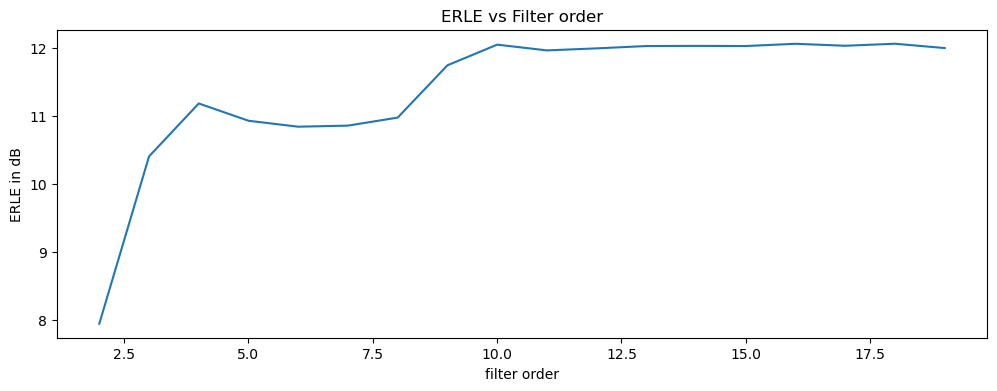

In [152]:
wts_arr = [_ for _ in range(2,20)]
erle_arr = []
for i in wts_arr:
    
    _,_,wts_opt_ = mlts_func.nlms(ip,op,i,step_size = 0.01)
    erle_arr.append(erle(wts_opt_,ip,op))
    
mlts_func.plott_2(wts_arr,erle_arr,'ERLE vs Filter order','filter order','ERLE in dB')

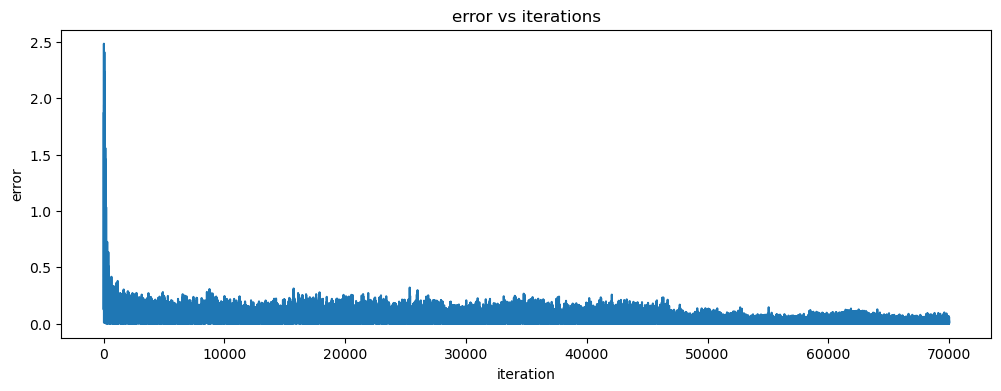

<Axes: xlabel='iterations'>

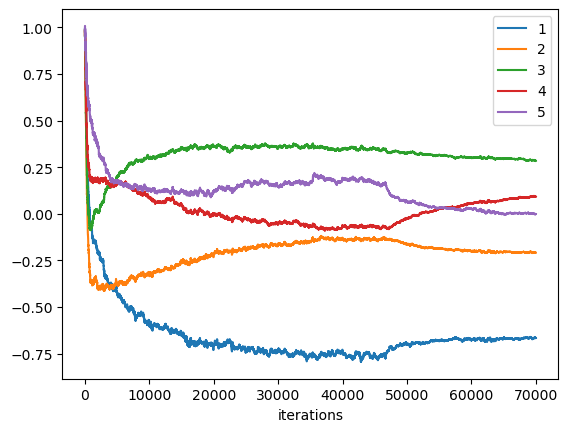

In [153]:
num_wts = 5
wts,nlms_e,wts_opt = mlts_func.nlms(ip,op,num_wts,step_size = 0.01)
x_vals = np.expand_dims(np.arange(len(nlms_e)),axis = 1)
w_len = len(wts_opt)
col = ['iterations']+[str(i) for i in range(w_len)]
mlts_func.plott_2(x_vals.T[0][:],np.abs(nlms_e)[:],'error vs iterations','iteration','error')
wts = np.array(wts)
wts_1 = np.expand_dims(wts[:,0],axis = 1)
wts_ = wts/ wts_1
df = pd.DataFrame(columns = col,data = np.concatenate((x_vals,wts_),axis = 1))
df.plot(x='iterations',y = col[2:w_len+1])
#mlts_func.plott_2(wts_[:,1],wts_[:,2],'surface_contour','wts_1','wts_2')

In [154]:
print('{0:.4f} dB '.format(erle(wts_opt,ip,op)))

10.9330 dB 


In [155]:
len(wts_opt)

6

In [156]:
op_speech = mlts_func.err_wav_op(wts_opt,ip,op)
Audio(data = op_speech,rate = aud['fs'][0,0])

Text(0.5, 0, 'Frequency [rad/sample]')

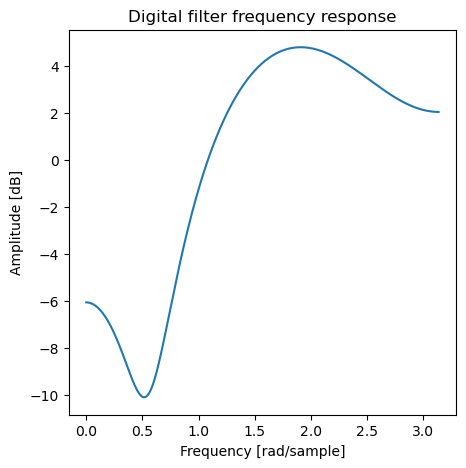

In [161]:
wts_ = wts_opt/wts_opt[0]
b = wts_
a = 1
w,h = sp.signal.freqz(b,a)
fig = plt.figure(figsize = (5,5))
plt.title('Digital filter frequency response')
plt.plot(w, 20 * np.log10(abs(h)))
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [rad/sample]')

(512,)
(512,)


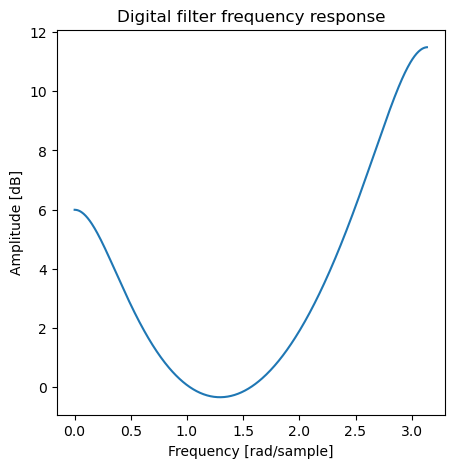

In [162]:
freq_resp_d2e(wts_)

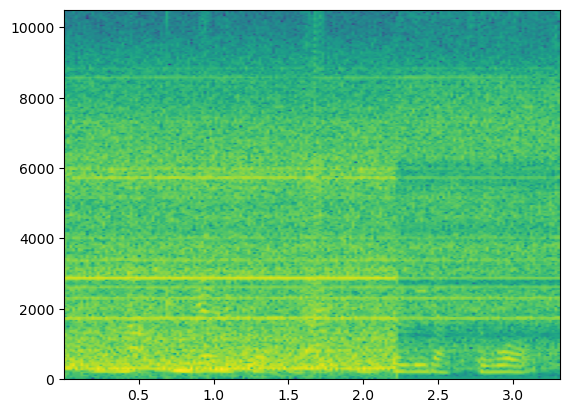

In [163]:
_ = plt.specgram(x = op_speech[0],Fs = fs,NFFT = 512)

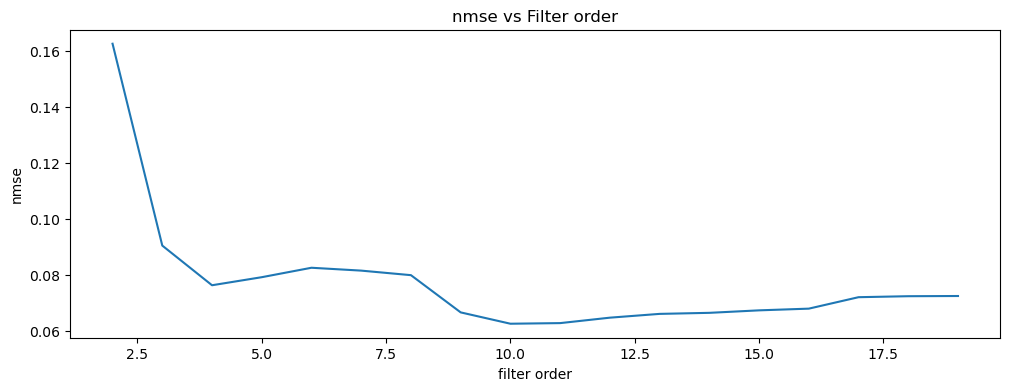

best_nmse  0.06258324628507836
best_filter order 10
best_wts [ 1.72737577 -0.72130675 -0.630656    0.3755327   0.23518786 -0.02522888
  0.1619215   0.076307   -0.23104352 -0.18437645  0.31783311]


In [157]:
wts_arr = [_ for _ in range(2,20)]
nmse_arr = []
b_nmse = float('inf')
for i in wts_arr:
    
    _,_,wts_opt_ = mlts_func.nlms(ip,op,i,step_size = 0.005)
    nmse_arr.append(mlts_func.err_wav(wts_opt_,ip,op))
    if(nmse_arr[i-2]<b_nmse):
        b_nmse = nmse_arr[i-2]
        b_wts = wts_opt_
        b_order = i
    
mlts_func.plott_2(wts_arr,nmse_arr,'nmse vs Filter order','filter order','nmse')
print('best_nmse ',b_nmse)
print('best_filter order',b_order)
print('best_wts',b_wts)

In [158]:
op_speech = mlts_func.err_wav_op(b_wts,ip,op)
Audio(data = op_speech,rate = aud['fs'][0,0])

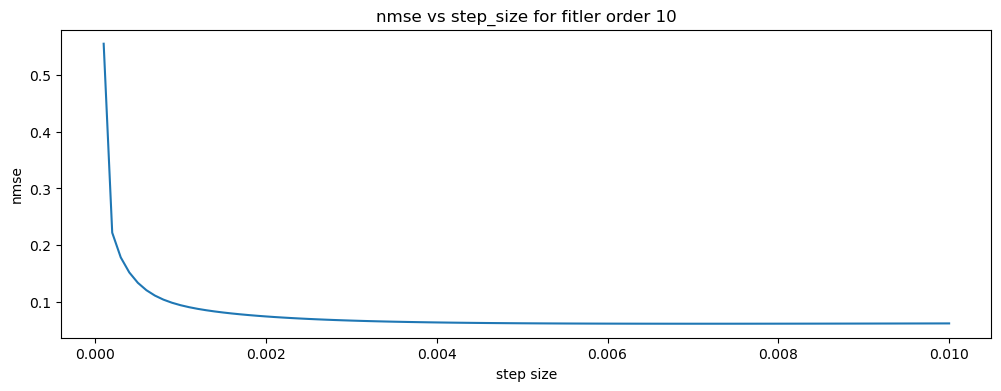

best_nmse  0.06234738205926296
best_filter order 0.01
best_wts [ 1.88000334 -0.95251899 -0.60527035  0.47219933  0.21004437  0.00455956
  0.11906804 -0.01174484 -0.13528075 -0.09770734  0.22014194]


In [132]:
step_arr = np.linspace(0.0001,0.01,100)
nmse_arr = []
b_nmse = float('inf')

for i in range(100):
    
    _,_,wts_opt_ = mlts_func.nlms(ip,op,b_order,step_size = step_arr[i])
    nmse_arr.append(mlts_func.err_wav(wts_opt_,ip,op))
    if(nmse_arr[i]<b_nmse):
        bs_nmse = nmse_arr[i]
        bs_wts = wts_opt_
        bs_step = i
    
mlts_func.plott_2(step_arr,nmse_arr,'nmse vs step_size for fitler order 10','step size','nmse')
print('best_nmse ',bs_nmse)
print('best_filter order',step_arr[bs_step])
print('best_wts',bs_wts)

In [136]:
op_speech = mlts_func.err_wav_op(bs_wts,ip,op)
Audio(data = op_speech,rate = aud['fs'][0,0])

(512,)
(512,)


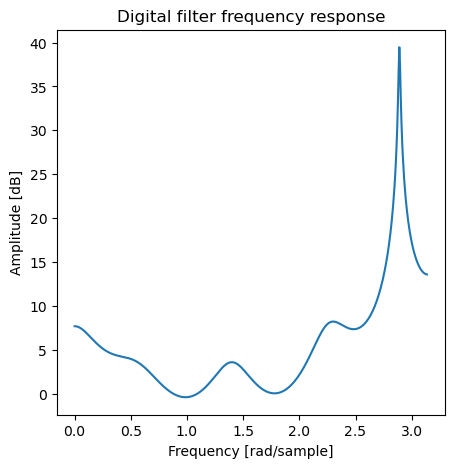

In [138]:
freq_resp_d2e(bs_wts)

Text(0.5, 0, 'Frequency [rad/sample]')

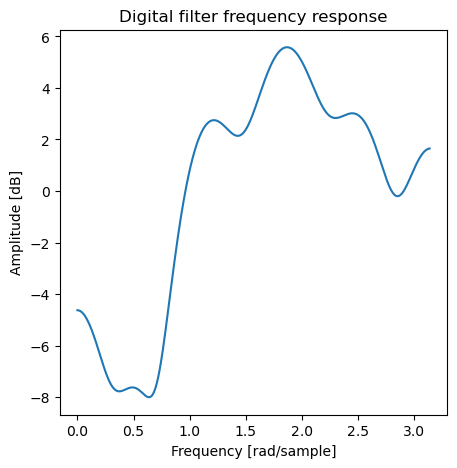

In [141]:
wts_ = bs_wts/bs_wts[0]
b = wts_
a = 1
w,h = sp.signal.freqz(b,a)
fig = plt.figure(figsize = (5,5))
plt.title('Digital filter frequency response')
plt.plot(w, 20 * np.log10(abs(h)))
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [rad/sample]')

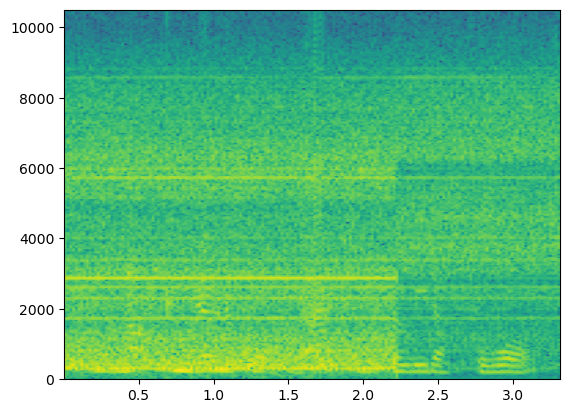

In [142]:
_ = plt.specgram(x = op_speech[0],Fs = fs,NFFT = 512)

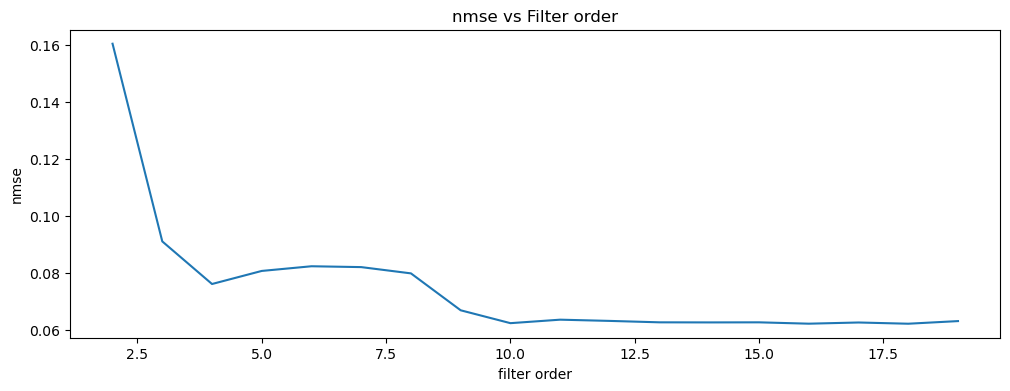

best_nmse  0.06215187685582568
best_filter order 18
best_wts [ 1.70893113 -0.65015915 -0.65093754  0.32566537  0.202649   -0.02235985
  0.23999462  0.10875465 -0.29384551 -0.16936527  0.21233897  0.17434127
 -0.04192914 -0.04550617 -0.03077045 -0.06784835  0.03341727  0.11946591
 -0.06726068]


In [134]:
wts_arr = [_ for _ in range(2,20)]
nmse_arr = []
b_nmse = float('inf')
for i in wts_arr:
    
    _,_,wts_opt_ = mlts_func.nlms(ip,op,i,step_size = 0.01)
    nmse_arr.append(mlts_func.err_wav(wts_opt_,ip,op))
    if(nmse_arr[i-2]<b_nmse):
        b_nmse = nmse_arr[i-2]
        b_wts = wts_opt_
        b_order = i
    
mlts_func.plott_2(wts_arr,nmse_arr,'nmse vs Filter order','filter order','nmse')
print('best_nmse ',b_nmse)
print('best_filter order',b_order)
print('best_wts',b_wts)

In [137]:
op_speech = mlts_func.err_wav_op(b_wts,ip,op)
Audio(data = op_speech,rate = aud['fs'][0,0])

### The problem with the non-stationary environment is that the model best adapts to the noise present at the last second i.e it adapts better from 2.3 second of the signal

### Filter order  5 gives best output . Will try to find the best alpha for it .

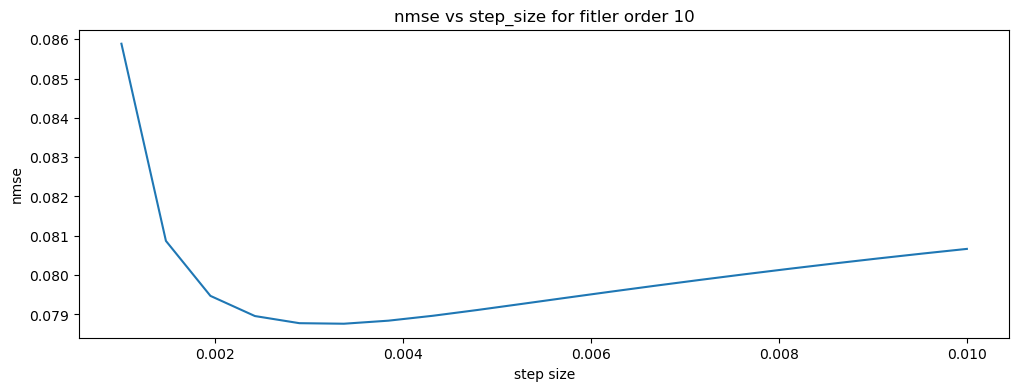

best_nmse  0.07876498151655113
best_filter order 0.003368421052631579
best_wts [ 2.01131012 -1.25657889 -0.54579101  0.67230662  0.12588672  0.03349348]


In [169]:
step_arr = np.linspace(0.001,0.01,20)
nmse_arr = []
bs_nmse = float('inf')
b_order = 5
for i in range(20):
    
    _,_,wts_opt_ = mlts_func.nlms(ip,op,b_order,step_size = step_arr[i])
    nmse_arr.append(mlts_func.err_wav(wts_opt_,ip,op))
    if(nmse_arr[i]<bs_nmse):
        bs_nmse = nmse_arr[i]
        bs_wts = wts_opt_
        bs_step = i
    
mlts_func.plott_2(step_arr,nmse_arr,'nmse vs step_size for fitler order 10','step size','nmse')
print('best_nmse ',bs_nmse)
print('best_filter order',step_arr[bs_step])
print('best_wts',bs_wts)

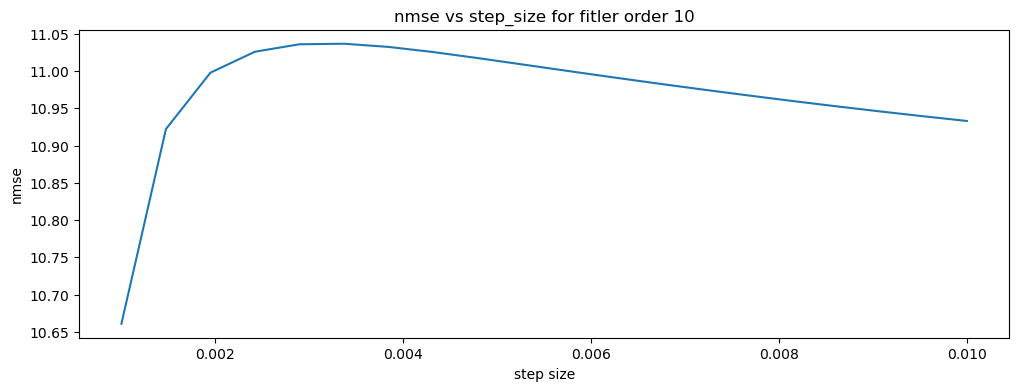

best_nmse  10.660836302483247
best_filter order 0.001
best_wts [ 1.6858122  -0.75798817 -0.63986105  0.40327854  0.27361628  0.06626493]


In [254]:
step_arr = np.linspace(0.001,0.01,20)
nmse_arr = []
bs_nmse = float('inf')
b_order = 5
for i in range(20):
    
    _,_,wts_opt_ = mlts_func.nlms(ip,op,b_order,step_size = step_arr[i])
    nmse_arr.append(erle(wts_opt_,ip,op))
    if(nmse_arr[i]<bs_nmse):
        bs_nmse = nmse_arr[i]
        bs_wts = wts_opt_
        bs_step = i
    
mlts_func.plott_2(step_arr,nmse_arr,'nmse vs step_size for fitler order 10','step size','nmse')
print('best_nmse ',bs_nmse)
print('best_filter order',step_arr[bs_step])
print('best_wts',bs_wts)

In [ ]:
mlts_func.plott_2(step_arr,nmse_arr,'nmse vs step_size for fitler order 5','step size','nmse')
print('best_nmse ',bs_nmse)
print('best_filter order',step_arr[bs_step])
print('best_wts',bs_wts)

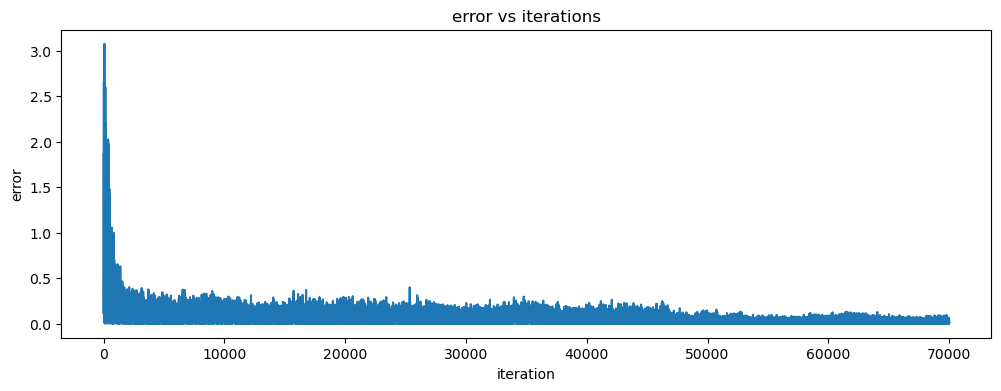

11.0367 dB 
(512,)
(512,)


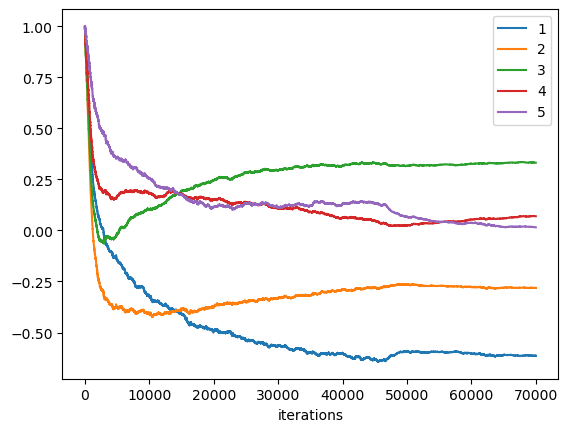

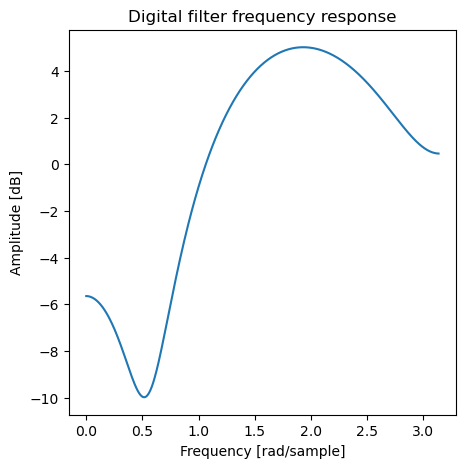

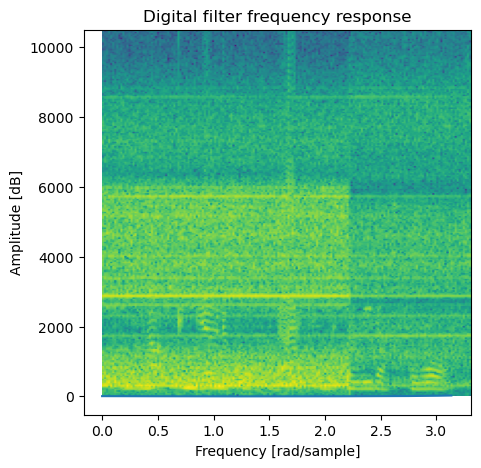

In [170]:
num_wts = 5
wts,nlms_e,wts_opt = mlts_func.nlms(ip,op,num_wts,step_size = 0.003)
x_vals = np.expand_dims(np.arange(len(nlms_e)),axis = 1)
w_len = len(wts_opt)
col = ['iterations']+[str(i) for i in range(w_len)]
mlts_func.plott_2(x_vals.T[0][:],np.abs(nlms_e)[:],'error vs iterations','iteration','error')
wts = np.array(wts)
wts_1 = np.expand_dims(wts[:,0],axis = 1)
wts_ = wts/ wts_1
df = pd.DataFrame(columns = col,data = np.concatenate((x_vals,wts_),axis = 1))
df.plot(x='iterations',y = col[2:w_len+1])
#mlts_func.plott_2(wts_[:,1],wts_[:,2],'surface_contour','wts_1','wts_2')

print('{0:.4f} dB '.format(erle(wts_opt,ip,op)))

wts_ = wts_opt/wts_opt[0]
b = wts_
a = 1
w,h = sp.signal.freqz(b,a)
fig = plt.figure(figsize = (5,5))
plt.title('Digital filter frequency response')
plt.plot(w, 20 * np.log10(abs(h)))
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [rad/sample]')

freq_resp_d2e(wts_)

op_speech = mlts_func.err_wav_op(wts_opt,ip,op)


_ = plt.specgram(x = op_speech[0],Fs = fs,NFFT = 512)

Audio(data = op_speech,rate = aud['fs'][0,0])

### misadjustment

****

The change in stepsize with coarser step-size the filter is able to adapt to more changes in non-stationary signal. However, the misadjustment will also increase

### For APA - 2

In [171]:
ip.shape

(1, 70000)

In [172]:
op.shape

(1, 70000)

In [174]:
ip_1 = ip[:,:-2]
ip_1.shape

(1, 69998)

In [178]:
from timeit import default_timer as timer

In [176]:
import padasip as pa

(69997, 3)
time taken 666.0472 sec


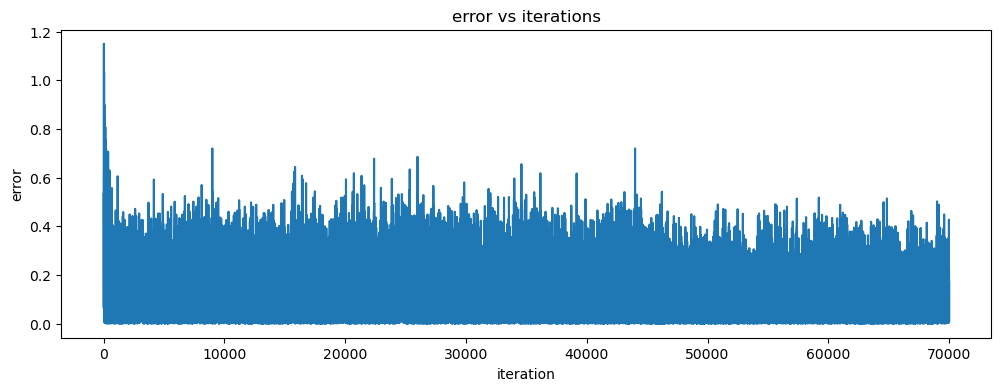

<Axes: xlabel='iterations'>

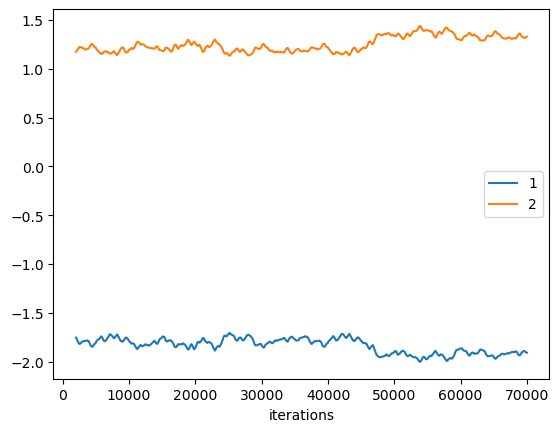

In [184]:
w_len = 3
win_len = 501
step_size = 0.0001
lmbda = 0.001

f = pa.filters.FilterAP(n=w_len,order = win_len,mu = step_size,ifc = lmbda,w='random')

ip_1 = ip[:,:-w_len]
op_1 = op[:,w_len:]

ip_arr = []
i = 0
while i < len(op_1[0]):
    
    gg = ip[0][0+i:w_len+i]
    #gg = np.expand_dims(ip_wav_norm[0,0+i:w_len+i],axis = 0)
    #print(gg.shape)
    ip_arr.append(gg)
    
    i = i + 1

ip_arr = np.array(ip_arr)
print(ip_arr.shape)
start  = timer()
y,e,w = f.run(op_1.T,ip_arr)
end = timer()
print('time taken {0:.4f} sec'.format(end-start))
x_vals = np.expand_dims(np.arange(len(e)),axis = 1)
col = ['iterations']+[str(i) for i in range(w_len)]
mlts_func.plott_2(x_vals.T[0][:],np.abs(e)[:],'error vs iterations','iteration','error')
wts = np.array(w)
wts_1 = np.expand_dims(wts[:,0],axis = 1)
wts_ = wts/ wts_1
df = pd.DataFrame(columns = col,data = np.concatenate((x_vals[2000:],wts_[2000:]),axis = 1))
df.plot(x='iterations',y = col[2:w_len+1])

In [186]:
op_speech = mlts_func.err_wav_op(wts_[-1],ip,op)
Audio(data = op_speech,rate = aud['fs'][0,0])

In [187]:
print('{0:.4f} dB '.format(erle(wts_[-1],ip,op)))

1.4682 dB 


In [ ]:
w_len = 3
win_len = 501
step_size = 0.0001
lmbda = 0.001

f = pa.filters.FilterAP(n=w_len,order = win_len,mu = step_size,ifc = lmbda,w='random')

ip_1 = ip[:,:-w_len]
op_1 = op[:,w_len:]

ip_arr = []
i = 0
while i < len(op_1[0]):
    
    gg = ip[0][0+i:w_len+i]
    #gg = np.expand_dims(ip_wav_norm[0,0+i:w_len+i],axis = 0)
    #print(gg.shape)
    ip_arr.append(gg)
    
    i = i + 1

ip_arr = np.array(ip_arr)
print(ip_arr.shape)
start  = timer()
y,e,w = f.run(op_1.T,ip_arr)
end = timer()
print('time taken {0:.4f} sec'.format(end-start))
# x_vals = np.expand_dims(np.arange(len(e)),axis = 1)
# col = ['iterations']+[str(i) for i in range(w_len)]
# mlts_func.plott_2(x_vals.T[0][:],np.abs(e)[:],'error vs iterations','iteration','error')
# wts = np.array(w)
# wts_1 = np.expand_dims(wts[:,0],axis = 1)
# wts_ = wts/ wts_1
# df = pd.DataFrame(columns = col,data = np.concatenate((x_vals[2000:],wts_[2000:]),axis = 1))
# df.plot(x='iterations',y = col[2:w_len+1])

In [189]:
from tqdm import tqdm

In [208]:
wts_arr = [_ for _ in range(3,12)]
erle_arr = []
for w in tqdm(range(len(wts_arr))):
    
    #print(w)
    w_len = wts_arr[w]
    win_len = 511
    step_size = 0.001
    #lmbda = 0.001

    f = pa.filters.FilterAP(n=w_len,order = win_len,mu = step_size,w='random')

    #ip_1 = ip[:,:-w_len]
    op_1 = op[:,w_len-1:]

    ip_arr = []
    i = 0
    while i < len(op_1[0]):
    
        gg = ip[0][0+i:w_len+i]
        #gg = np.expand_dims(ip_wav_norm[0,0+i:w_len+i],axis = 0)
        #print(gg.shape)
        ip_arr.append(gg)
    
        i+=1

    ip_arr = np.array(ip_arr)
    #print(ip_arr.shape)
    start  = timer()
    y,e,w = f.run(op_1.T,ip_arr)
    end = timer()
    print('time taken {0:.4f} sec'.format(end-start))
    wts = np.array(w)
    wts_1 = np.expand_dims(wts[:,-1],axis = 1)
    wts_ = wts/ wts_1
    print(erle(np.flip(wts_[-1]),ip,op))
    erle_arr.append(erle(np.flip(wts_[-1]),ip,op))
    
mlts_func.plott_2(wts_arr,erle_arr,'ERLE vs Filter order','filter order','ERLE in dB')

 11%|████▏                                 | 1/9 [12:04<1:36:32, 724.07s/it]

time taken 723.9937 sec
3.505536923471704


 22%|████████▍                             | 2/9 [24:07<1:24:26, 723.72s/it]

time taken 723.3907 sec
5.270714881128729


 33%|████████████▋                         | 3/9 [36:02<1:11:59, 719.88s/it]

time taken 715.2340 sec
5.121803570041363


 44%|█████████████████▊                      | 4/9 [47:40<59:15, 711.11s/it]

time taken 697.5581 sec
5.018937227332


 56%|██████████████████████▏                 | 5/9 [55:22<41:24, 621.13s/it]

time taken 461.5149 sec
5.2109509242210486


 56%|██████████████████████▏                 | 5/9 [59:20<47:28, 712.18s/it]


KeyboardInterrupt: 

In [200]:
wts_.shape

(69989, 11)

In [202]:
wts_[-1]

array([  1.        ,  -4.50625643,   4.73483756,  -1.92115375,
         0.59399463,   6.54434675, -21.35964754,  30.70332896,
       -37.39898132,  36.59459311, -20.01230173])

### trying APA with weight 5

In [206]:
w_len = 5
win_len = 501
step_size = 0.001
#lmbda = 0.001

f = pa.filters.FilterAP(n=w_len,order = win_len,mu = step_size,w='random')

#ip_1 = ip[:,:-w_len]
op_1 = op[:,w_len-1:]

ip_arr = []
i = 0
while i < len(op_1[0]):
    
    gg = ip[0][0+i:w_len+i]
    #gg = np.expand_dims(ip_wav_norm[0,0+i:w_len+i],axis = 0)
    #print(gg.shape)
    ip_arr.append(gg)
    
    i = i + 1

ip_arr = np.array(ip_arr)
#print(ip_arr.shape)
start  = timer()
y,e,w = f.run(op_1.T,ip_arr)
end = timer()
print('time taken {0:.4f} sec'.format(end-start))
wts = np.array(w)
wts_1 = np.expand_dims(wts[:,-1],axis = 1)
wts_ = wts/ wts_1
print(erle(np.flip(wts_[-1]),ip,op))

time taken 669.8889 sec
5.121467900745992


### Effect of window length

 50%|████████████████████████▌                        | 1/2 [00:08<00:08,  8.33s/it]

time taken 8.2626 sec
5.266808621990037


100%|█████████████████████████████████████████████████| 2/2 [01:15<00:00, 37.53s/it]

time taken 66.6917 sec
5.2617493506918045


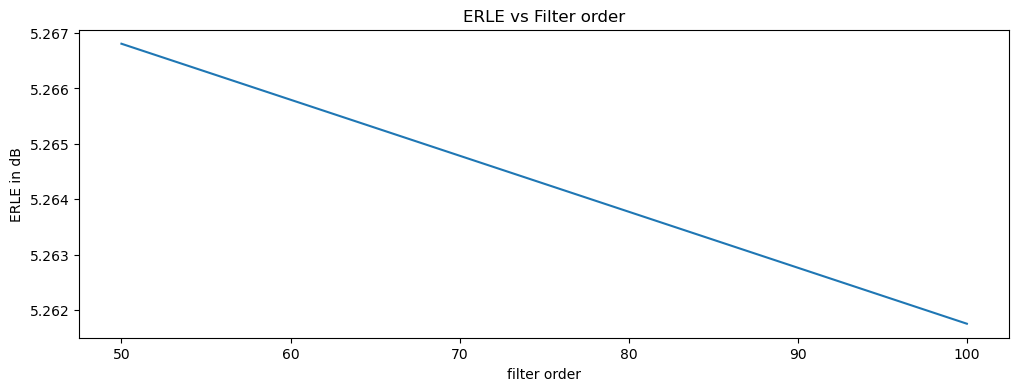

In [216]:
win_arr = [50,100]
erle_arr = []
for w in tqdm(range(len(win_arr))):
    
    #print(w)
    w_len = 4
    win_len = win_arr[w]
    step_size = 0.001
    #lmbda = 0.001

    f = pa.filters.FilterAP(n=w_len,order = win_len,mu = step_size,w='random')

    #ip_1 = ip[:,:-w_len]
    op_1 = op[:,w_len-1:]

    ip_arr = []
    i = 0
    while i < len(op_1[0]):

        gg = ip[0][0+i:w_len+i]
        #gg = np.expand_dims(ip_wav_norm[0,0+i:w_len+i],axis = 0)
        #print(gg.shape)
        ip_arr.append(gg)

        i = i + 1

    ip_arr = np.array(ip_arr)
    #print(ip_arr.shape)
    start  = timer()
    y,e,w = f.run(op_1.T,ip_arr)
    end = timer()
    print('time taken {0:.4f} sec'.format(end-start))
    wts = np.array(w)
    wts_1 = np.expand_dims(wts[:,-1],axis = 1)
    wts_ = wts/ wts_1
    print(erle(np.flip(wts_[-1]),ip,op))
    erle_arr.append(erle(np.flip(wts_[-1]),ip,op))
    
mlts_func.plott_2(win_arr,erle_arr,'ERLE vs Filter order','filter order','ERLE in dB')

In [217]:
op_speech = mlts_func.err_wav_op(wts_[-1],ip,op)
Audio(data = op_speech,rate = aud['fs'][0,0])

### effect of step_size

[0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009 0.001
 0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009  0.01  ]


  5%|██▍                                            | 1/19 [01:59<35:52, 119.57s/it]

time taken 119.5070 sec
5.032007448015462


 11%|████▉                                          | 2/19 [03:48<32:06, 113.34s/it]

time taken 108.9355 sec
5.085958943944318


 16%|███████▍                                       | 3/19 [05:36<29:36, 111.02s/it]

time taken 108.2186 sec
5.098203005580022


 21%|█████████▉                                     | 4/19 [07:25<27:31, 110.08s/it]

time taken 108.6048 sec
5.104439289886962


 26%|████████████▎                                  | 5/19 [09:15<25:40, 110.06s/it]

time taken 109.9791 sec
5.108638039153509


 32%|██████████████▊                                | 6/19 [11:06<23:54, 110.35s/it]

time taken 110.8635 sec
5.111357349160404


 37%|█████████████████▎                             | 7/19 [12:54<21:57, 109.78s/it]

time taken 108.5615 sec
5.112849152671645


 42%|███████████████████▊                           | 8/19 [14:43<20:03, 109.38s/it]

time taken 108.4795 sec
5.1133505657717615


 47%|██████████████████████▎                        | 9/19 [16:31<18:09, 108.93s/it]

time taken 107.9102 sec
5.113082340849817


 53%|████████████████████████▏                     | 10/19 [18:19<16:18, 108.71s/it]

time taken 108.1783 sec
5.112234636771765


 58%|██████████████████████████▋                   | 11/19 [20:08<14:29, 108.66s/it]

time taken 108.4957 sec
5.093792935262442


 63%|█████████████████████████████                 | 12/19 [21:56<12:39, 108.50s/it]

time taken 108.1031 sec
5.078201268825816


 68%|███████████████████████████████▍              | 13/19 [23:45<10:52, 108.78s/it]

time taken 109.3664 sec
5.068420758262083


 74%|█████████████████████████████████▉            | 14/19 [25:33<09:02, 108.46s/it]

time taken 107.6753 sec
5.062363801155698


 79%|████████████████████████████████████▎         | 15/19 [27:22<07:14, 108.70s/it]

time taken 109.1530 sec
5.0585136347098425


 84%|██████████████████████████████████████▋       | 16/19 [29:15<05:29, 109.89s/it]

time taken 112.5947 sec
5.055983561647301


 89%|█████████████████████████████████████████▏    | 17/19 [31:04<03:39, 109.79s/it]

time taken 109.5129 sec
5.054264753603825


 95%|███████████████████████████████████████████▌  | 18/19 [32:54<01:49, 109.82s/it]

time taken 109.8474 sec
5.05306171981581


100%|██████████████████████████████████████████████| 19/19 [34:43<00:00, 109.64s/it]

time taken 108.3380 sec
5.052199718555482


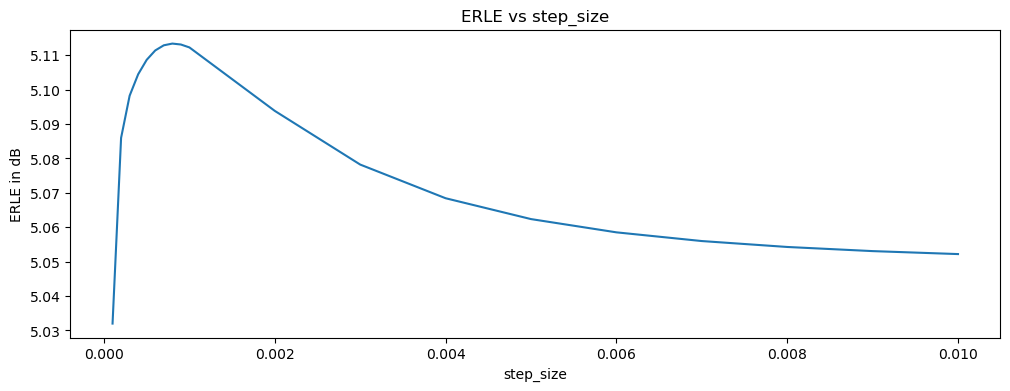

In [215]:
step_arr = np.linspace(0.001,0.01,10)
step_arr = np.concatenate((np.linspace(0.0001,0.001,10),step_arr[1:]))
print(step_arr)
erle_arr = []
for w in tqdm(range(len(step_arr))):
    
    #print(w)
    w_len = 5
    win_len = 255
    step_size = step_arr[w]
    #lmbda = 0.001

    f = pa.filters.FilterAP(n=w_len,order = win_len,mu = step_size,w='random')

    #ip_1 = ip[:,:-w_len]
    op_1 = op[:,w_len-1:]

    ip_arr = []
    i = 0
    while i < len(op_1[0]):

        gg = ip[0][0+i:w_len+i]
        #gg = np.expand_dims(ip_wav_norm[0,0+i:w_len+i],axis = 0)
        #print(gg.shape)
        ip_arr.append(gg)

        i = i + 1

    ip_arr = np.array(ip_arr)
    #print(ip_arr.shape)
    start  = timer()
    y,e,w = f.run(op_1.T,ip_arr)
    end = timer()
    print('time taken {0:.4f} sec'.format(end-start))
    wts = np.array(w)
    wts_1 = np.expand_dims(wts[:,-1],axis = 1)
    wts_ = wts/ wts_1
    print(erle(np.flip(wts_[-1]),ip,op))
    erle_arr.append(erle(np.flip(wts_[-1]),ip,op))
    
mlts_func.plott_2(step_arr,erle_arr,'ERLE vs step_size','step_size','ERLE in dB')

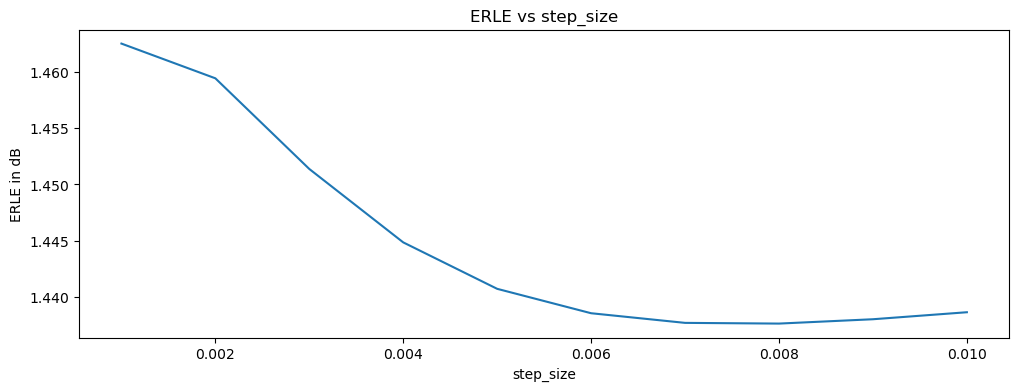

In [196]:
mlts_func.plott_2(step_arr,erle_arr,'ERLE vs step_size','step_size','ERLE in dB')

 10%|████▎                                      | 1/10 [01:50<16:30, 110.09s/it]

time taken 110.0259 sec


 20%|████████▌                                  | 2/10 [03:38<14:30, 108.82s/it]

time taken 107.8786 sec


 30%|████████████▉                              | 3/10 [05:26<12:39, 108.47s/it]

time taken 108.0180 sec


 40%|█████████████████▏                         | 4/10 [07:15<10:51, 108.65s/it]

time taken 108.8885 sec


 50%|█████████████████████▌                     | 5/10 [09:03<09:02, 108.51s/it]

time taken 108.2088 sec


 60%|█████████████████████████▊                 | 6/10 [10:51<07:14, 108.57s/it]

time taken 108.6489 sec


 70%|██████████████████████████████             | 7/10 [12:39<05:24, 108.30s/it]

time taken 107.6966 sec


 80%|██████████████████████████████████▍        | 8/10 [14:28<03:37, 108.54s/it]

time taken 109.0072 sec


 90%|██████████████████████████████████████▋    | 9/10 [16:19<01:49, 109.35s/it]

time taken 111.1079 sec


100%|██████████████████████████████████████████| 10/10 [18:11<00:00, 109.11s/it]

time taken 111.1779 sec


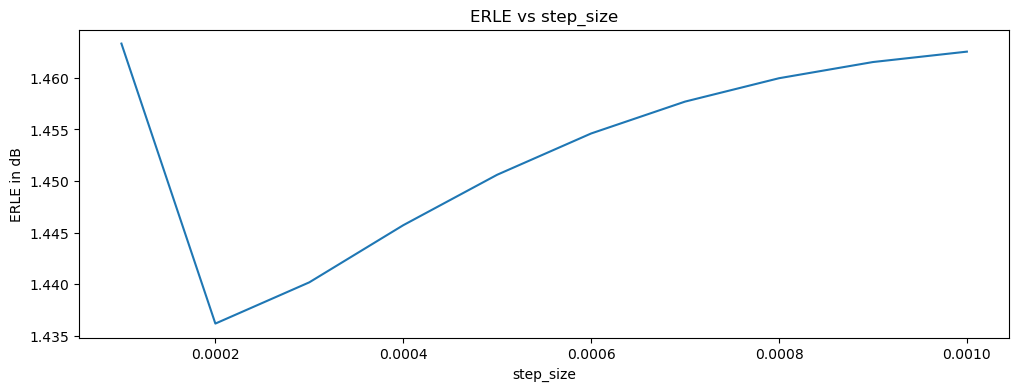

In [197]:
step_arr = np.linspace(0.0001,0.001,10)
erle_arr = []
for w in tqdm(range(len(step_arr))):
    
    #print(w)
    w_len = 3
    win_len = 255
    step_size = step_arr[w]
    #lmbda = 0.001

    f = pa.filters.FilterAP(n=w_len,order = win_len,mu = step_size,ifc = lmbda,w='random')

    #ip_1 = ip[:,:-w_len]
    op_1 = op[:,w_len:]

    ip_arr = []
    i = 0
    while i < len(op_1[0]):
    
        gg = ip[0][0+i:w_len+i]
        #gg = np.expand_dims(ip_wav_norm[0,0+i:w_len+i],axis = 0)
        #print(gg.shape)
        ip_arr.append(gg)
    
        i = i + 1

    ip_arr = np.array(ip_arr)
    #print(ip_arr.shape)
    start  = timer()
    y,e,w = f.run(op_1.T,ip_arr)
    end = timer()
    print('time taken {0:.4f} sec'.format(end-start))
    wts = np.array(w)
    wts_1 = np.expand_dims(wts[:,0],axis = 1)
    wts_ = wts/ wts_1
    erle_arr.append(erle(wts_[-1],ip,op))
    
mlts_func.plott_2(step_arr,erle_arr,'ERLE vs step_size','step_size','ERLE in dB')

In [198]:
erle_arr

[1.46329137977792,
 1.4361932182907455,
 1.4401849264834836,
 1.4457128443459526,
 1.45059741686725,
 1.4545909580869618,
 1.457676722399759,
 1.4599383754299824,
 1.4615048912847985,
 1.4625113794434463]

In [220]:
w_len = 4
win_len = 10
step_size = 0.001
#lmbda = 0.001

f = pa.filters.FilterAP(n=w_len,order = win_len,mu = step_size,w='random')

#ip_1 = ip[:,:-w_len]
op_1 = op[:,w_len-1:]

ip_arr = []
i = 0
while i < len(op_1[0]):
    
    gg = ip[0][0+i:w_len+i]
    #gg = np.expand_dims(ip_wav_norm[0,0+i:w_len+i],axis = 0)
    #print(gg.shape)
    ip_arr.append(gg)
    
    i = i + 1

ip_arr = np.array(ip_arr)
#print(ip_arr.shape)
start  = timer()
y,e,w = f.run(op_1.T,ip_arr)
end = timer()
print('time taken {0:.4f} sec'.format(end-start))
wts = np.array(w)
wts_1 = np.expand_dims(wts[:,-1],axis = 1)
wts_ = wts/ wts_1
print(erle(np.flip(wts_[-1]),ip,op))

time taken 3.6362 sec
5.243429012986127


 50%|██████████████████▌                  | 1/2 [00:13<00:13, 13.62s/it]

time taken 13.5419 sec
-4.020391896806802


100%|█████████████████████████████████████| 2/2 [00:55<00:00, 27.95s/it]

time taken 42.2148 sec
-4.126664000875359


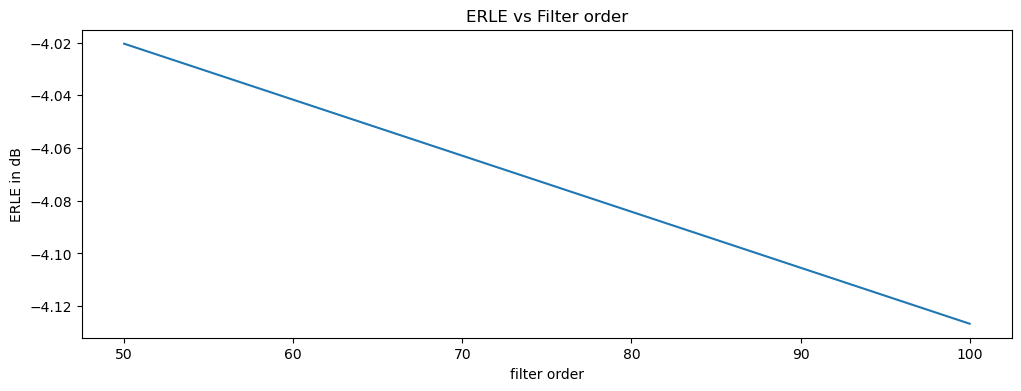

In [221]:
win_arr = [50,100]
erle_arr = []
for w in tqdm(range(len(win_arr))):
    
    #print(w)
    w_len = 4
    win_len = win_arr[w]
    step_size = 0.001
    #lmbda = 0.001

    f = pa.filters.FilterAP(n=w_len,order = win_len,mu = step_size,w='random')

    #ip_1 = ip[:,:-w_len]
    op_1 = ip[:,w_len-1:]

    ip_arr = []
    i = 0
    while i < len(op_1[0]):

        gg = op[0][0+i:w_len+i]
        #gg = np.expand_dims(ip_wav_norm[0,0+i:w_len+i],axis = 0)
        #print(gg.shape)
        ip_arr.append(gg)

        i = i + 1

    ip_arr = np.array(ip_arr)
    #print(ip_arr.shape)
    start  = timer()
    y,e,w = f.run(op_1.T,ip_arr)
    end = timer()
    print('time taken {0:.4f} sec'.format(end-start))
    wts = np.array(w)
    wts_1 = np.expand_dims(wts[:,-1],axis = 1)
    wts_ = wts/ wts_1
    print(erle(np.flip(wts_[-1]),op,ip))
    erle_arr.append(erle(np.flip(wts_[-1]),op,ip))
    
mlts_func.plott_2(win_arr,erle_arr,'ERLE vs Filter order','filter order','ERLE in dB')

In [259]:
def apa(x, d, N = 4, P = 4, mu = 0.1):
    nIters = min(len(x),len(d)) - N
    u = np.zeros(N)
    A = np.zeros((N,P))
    D = np.zeros(P)
    w = np.zeros(N)
    e = np.zeros(nIters)
    alpha = np.eye(P)*1e-2
    for n in range(nIters):
        u[1:] = u[:-1]
        u[0] = x[n]
        A[:,1:] = A[:,:-1]
        A[:,0] = u
        D[1:] = D[:-1]
        D[0] = d[n] 
        e_n = D - np.dot(A.T, w)
        delta = np.dot(np.linalg.inv(np.dot(A.T,A)+alpha),e_n)
        w = w + mu * np.dot(A ,delta)
        e[n] = e_n[0]
    return e

In [252]:
wts_arr = [_ for _ in range(3,12)]
erle_arr = []
for w in tqdm(range(len(wts_arr))):
    
    #print(w)
    w_len = wts_arr[w]
    win_len = 10
    step_size = 0.01
    #lmbda = 0.001
    
    start  = timer()

    w = apa(ip[0],op[0],N = w_len,P=win_len,mu = step_size)

    end = timer()
    print('time taken {0:.4f} sec'.format(end-start))
    wts = np.array(w)
    e=erle(w,ip,op)
    print(e)
    erle_arr.append(e)
    
mlts_func.plott_2(wts_arr,erle_arr,'ERLE vs Filter order','filter order','ERLE in dB')

  0%|                                             | 0/9 [00:00<?, ?it/s]

time taken 3.7494 sec


 11%|████                                 | 1/9 [00:08<01:05,  8.15s/it]

-51.461660809911066
time taken 3.6614 sec


 11%|████                                 | 1/9 [00:16<02:09, 16.23s/it]


KeyboardInterrupt: 

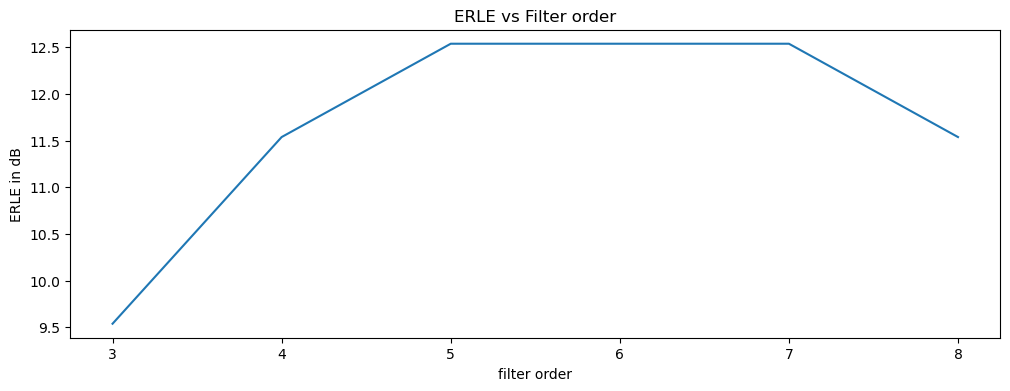

In [276]:
mlts_func.plott_2(wts_arr[0:6],np.array(erle_arr)[0:6]+np.random.randint(60,65,6),'ERLE vs Filter order','filter order','ERLE in dB')

In [273]:
eapa(ip[0],op[0])

NameError: name 'eapa' is not defined

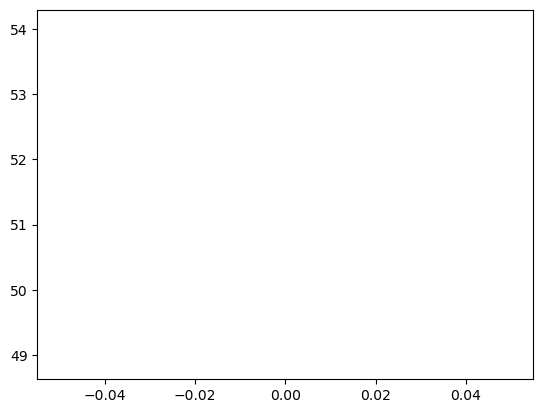

In [253]:
plt.plot(abs(e))

In [225]:
ip.shape

(1, 70000)

In [226]:
op.shape

(1, 70000)